# Social Network Analysis Project: Report 1
# Exploring the *Titanic* dataset

## Introduction - *Unveiling Titanic's Social Fabric: A Network Analysis*

### Group F members
The minds behind this journey are: **Leonardo Azzi**, **Sofia Bruni**, **Francesca Romana Sanna**, **Alexandra Tabarani** and **Marta Torella**, five students of the Bachelor in Management and Computer Science.

Throughout the course weeks, we aim to not only visually represent these connections but also analyze them through various graph metrics.

In our project, the **characters** aboard the Titanic take center stage as *nodes*, while the *edges* connecting them represent **shared scenes**, their *weights* reflecting the **frequency** of these shared appearences.
This analytical approach allows us to decode the complex web of interactions that shaped the destinies of the movie characters.

Through meticulous examination, we will be able to uncover the characters as well as the patterns of connection that lie underneath the narrative.

*Join us as we sail through the Titanic's data!*

### Imports
We start by importing the necessary libraries for our analysis.

In [3]:
# Basic Imports with aliases
import numpy as np 
import matplotlib.pyplot as plt
import csv
import networkx as nx

## Week 1: Networks
## *Introduction to Graph Creation and Basic Analysis*

### Objective
The primary objective this week was to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

### Graph Construction
In our graphical illustration:
- **Nodes** represent individual *characters* in the movie
- **Edges** indicate the presence of a *shared scene* between two characters
- **Edge weights** reflect the *frequency* of these shared scenes

### Graph Analysis
We then analyzed the graph by determining some of its basic properties:
- **Total number of nodes and edges**: to understand the *scale and complexity* of the graph
- **Average degree**: computed using the formula $\frac{2E}{N}$, where $E$ stands for the total number of edges and $N$ is the number of nodes, giving an average of *connections per node*
- **Graph density**: calculated with $D = \frac{2E}{N \times (N-1)}$, where $D$ is the density, $E$ is the number of edges and $N$ is the number of nodes. This metric is useful to understand how many connections are present in the graph, compared to the maximum possible number of connections, hence providing an insight into the *overall connectivity*. The density of a graph can range from 0 to 1, with 0 indicating a graph with no edges and 1 a graph with the maximum number of edges.

### Insights gained
By computing these metrics, we were able to gain a better understanding of the graph's structure and complexity: we have a *weighted* and *undirected* graph, with 70 nodes and 299 edges. In particular, we obtained a foundational knowledge that will be expanded upon in the following weeks.

### Loading the **Graph** from the given CSV files

In [4]:
G = nx.Graph() # Create a graph

# Read nodes from *nodes.csv* file
with open('../Project/Graph/nodes.csv', 'r') as file:       # Open the CSV file
    reader = csv.DictReader(file)                   # DictReader is a class that reads a CSV file and converts it into a dictionary
    for row in reader:                              # Iterate over the rows of the CSV file, each row is a dictionary
        G.add_node(row['Id'], label=row['Label'])   # Add a node to the graph with the node id and label

# Read edges from *edges.csv* file
with open('../Project/Graph/edges.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight=int(row['Weight'])) # Add an edge to the graph with the source, target and weight


### Plotting the graph

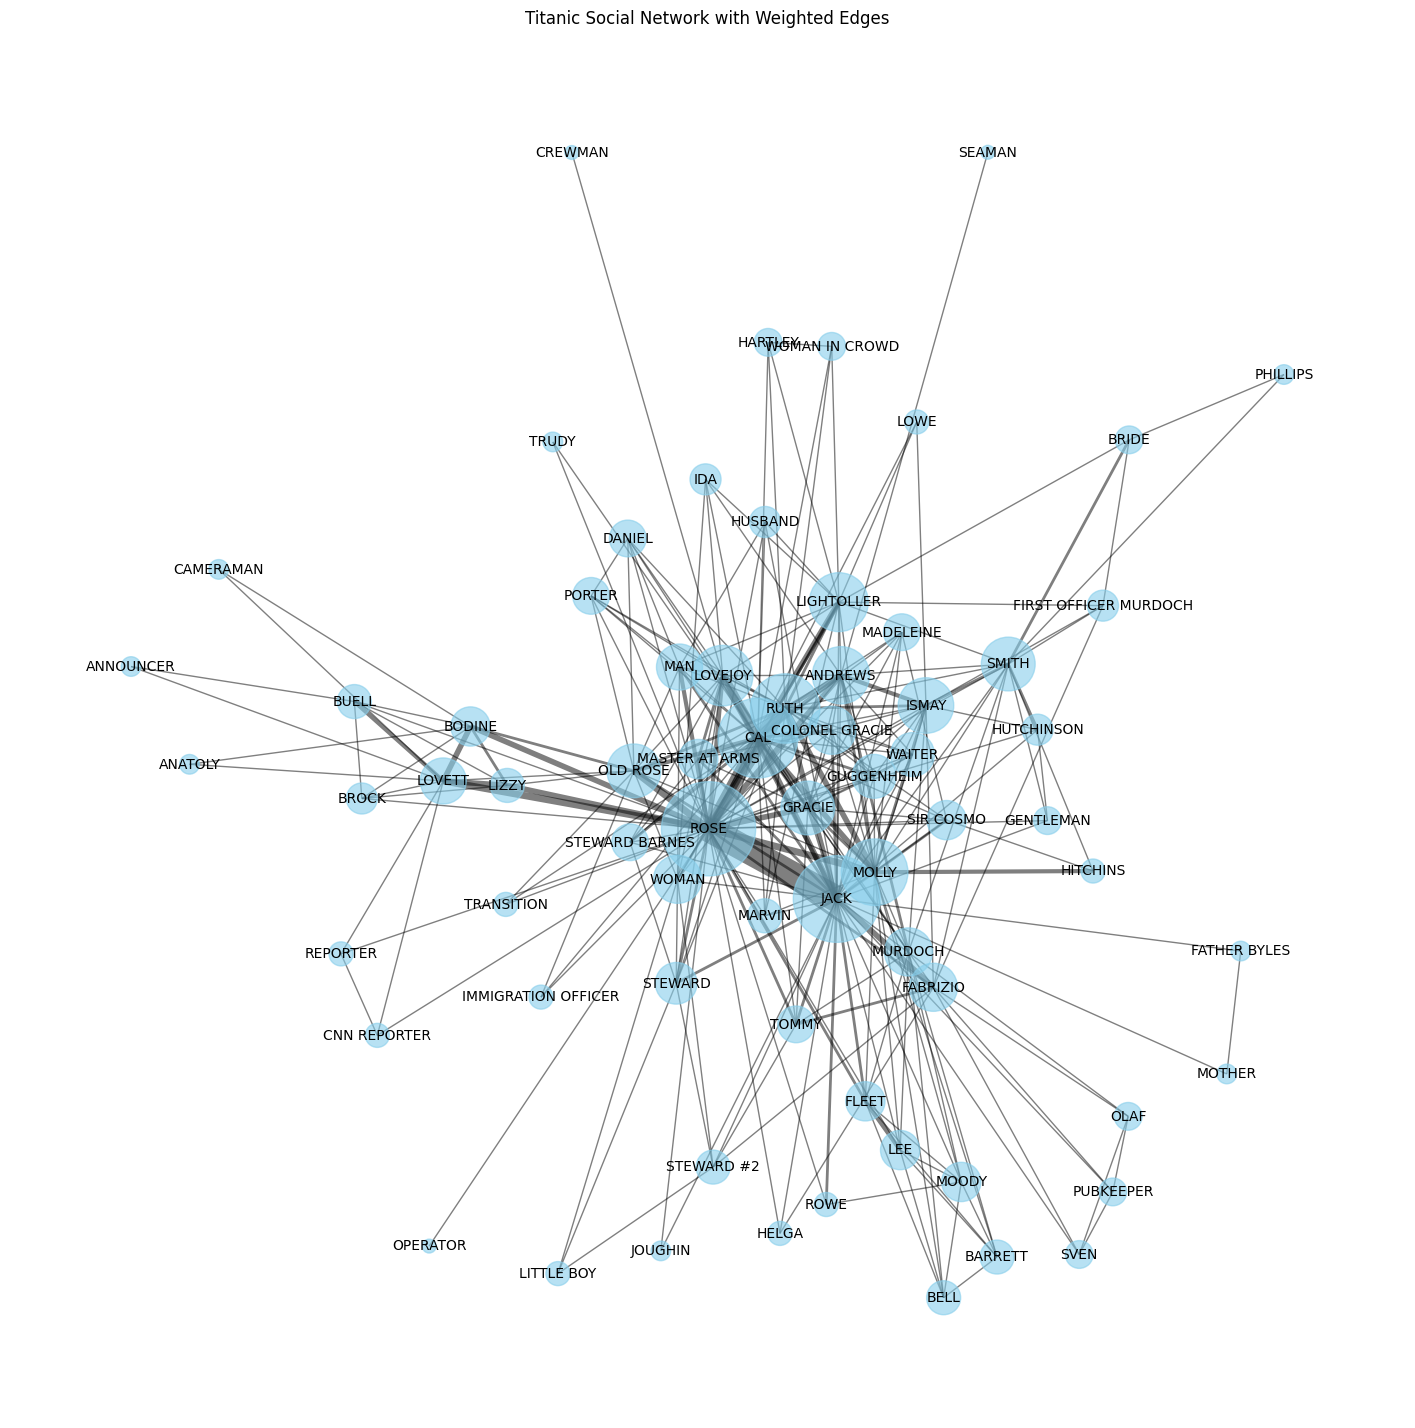

In [5]:
# Setting up the plot dimensions
plt.figure(figsize=(18, 18))

# Use the spring layout algorithm for positioning the nodes
pos = nx.spring_layout(G)

# Adjust node sizes based on their degrees
node_sizes = [v * 100 for v in dict(G.degree()).values()]

# Adjust edge widths based on their weights
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)

plt.title("Titanic Social Network with Weighted Edges")
plt.axis("off")
plt.show()

### Graph Metrics

We found number of nodes, edges, average degree and density of the graph, using basic networkx functions.

In [6]:
#number of nodes
print("Number of nodes: ", G.number_of_nodes())

#number of edges
print("Number of edges: ", G.number_of_edges())

#average degree
print("Average degree: ", np.mean([d for n, d in G.degree()]))

#density
print("Density: ", nx.density(G))


Number of nodes:  70
Number of edges:  299
Average degree:  8.542857142857143
Density:  0.12380952380952381


## Week 2: Small Worlds
## *Measures and Properties in Networks*

### Objective
This week goal was to exploit some centrality measures - **average clustering** and **transitivity** - in order to better analyze the network's structural characteristics by identifying the key nodes and the presence of clusters.

### Average Clustering and Transitivity with *NetworkX*
As a first step, we implemented the average clustering and the transitivity by using the respective built-in functions in NetworkX; both metrics were used to understand the interconnectivity among nodes in our graph:
- **Average clustering**: the *average* of the *clustering coefficients* -- $C = 1/n(\sum_{i=1}^n C_i)$ -- where $C_i$ is the clustering coefficient and $n$ is the number of nodes. Each clustering coefficients is computed as the ratio of the *number of triangles* in which a node $i$ participates, over the *number of wedges* of that same node -- $[ki(ki-1)/2)]$ -- where $ki$ is the degree of node $i$
- **Transitivity**: the *ratio* between the total *number of triangles* over the *number of wedges* divided by three -- $T = 3 \frac{\#triangles}{\#wedges}$. This mathematical formula could also be expresses as the number of triangles times three, over the *sum* of all *clustering coefficients* -- $T = 3 \frac{\#triangles}{\sum_{i=1}^n C_i}$

### Implementation of our Transitivity Function
In the second part of this task, we had to implement from scratch our own function to compute the transitivity of the graph.\
We did so by following the mathematical formula provided above; in particular, we first count the *number of triangles* by iterating over each node: by doing so, we are able to find the *neighbours* of each node and register the *common* ones between one node and its neighbours (indicating number of triangles involving the current node).\
Then we divide the triangles *by 6*, since each one was originally counted six times (twice for each node of the triangle).\
Once we obtain the total number of triangles, we start looking for the wedges (or connected triples) by iterating again through each node, in order to identify once again neighbours and degree to apply the mathematical formula for *number of wedges* -- $[ki(ki-1)/2)]$.\
The final step of our code computes the **transitivity** as the number of triangles times three, over the number of wedges.

### Insights gained
With our functions, we discover that **transitivity** is equal to 0.3935, while **average clustering** is 0.7436. These two metrics are useful to understand the *interconnectivity* of the graph, as well as the presence of *clusters*, namely groups of nodes that are more densely connected to each other than to the rest of the graph. The numbers obtained tell us that the average clustering is fairly high, meaning that nodes tend to form *clusters* with their neighbours; however the transitivity is lower, so while there are local clusters, they may *not* be *as interconnected* across the entire network.

### Transitivity and Average Clustering: Basic Networkx functions

In [7]:
# Compute Average Clustering
avg_clustering = nx.average_clustering(G)

# Compute Transitivity
transitivity = nx.transitivity(G)

print("Average Clustering:", avg_clustering)
print("Transitivity:", transitivity)

Average Clustering: 0.7436551486762099
Transitivity: 0.39350485027414595


## Custom Transitivity Function
#### Computing Transitivity using a custom function and basic Networkx functions

In [8]:
# Redefine the compute_transitivity function

def compute_transitivity(graph):
    triangles = 0   # Initialize a counter for the number of triangles in the graph
    
    for node in graph.nodes():  # Iterate through each node in the graph
        neighbors = set(graph.neighbors(node))  # Store the neighbors of the current node in a set
        for neighbor in neighbors:  # Iterate through the neighbors of the current node
            common_neighbors = set(graph.neighbors(neighbor)) & neighbors   # Find the common neighbors of the current node and its neighbor
            triangles += len(common_neighbors)  # Add the number of common neighbors to the triangle count

    triangles = triangles // 6  # Each triangle is counted 6 times (once for each permutation of the three nodes)

    connected_triples = 0   # Initialize a counter for the number of connected triples in the graph

    for node in graph.nodes():
        k = len(list(graph.neighbors(node)))    # Get the degree (number of neighbors) of the current node
        connected_triples += k * (k - 1) // 2   # Add the number of connected triples to the count
    
    # Compute and return the transitivity, avoid division by zero
    if connected_triples == 0:
        return 0
    else:
        return (3 * triangles) / connected_triples

# Compute the transitivity for the graph
transitivity = compute_transitivity(G)
transitivity


0.39350485027414595

## Week 3: Hubs
## *Degree and Other Centrality Measures*

### Objective
This week objective challenged us in identifying the most relevant centrality measure among the ones provided; hence, after implementing the Closeness Centrality function, we also provided its cumulative distribution. 

## *Closeness Centrality Function*
### Why?
The first part involved the choice of a centrality measure, and we decided to dig deeper into our network by computing the Closeness Centrality. In our graph, this metric appeared particularly pertinent as it provides insights into how proximate a node (representing a character in this context) is to all other nodes in the network. Note that the weight of the edges connecting the nodes represent the occurence of the two characters in the same scene; hence, we wanted to discover which character had the largest screen presence in the movie. Threfore, we picked the Closeness Centrality measure since a node with a high closeness centrality score is one that is closer, on average, to all other nodes in the network. 

### Implementation of the function
Our first step was to define a function to compute weighted shortest path lengths from a source node using BFS: as a matter of fact we initialized a 'visited' set to keep track of the visited nodes, a 'dist' dictionary to store the shortest paths where the keys are nodes, and the values are their respective shortest path lengths from the source node, and a 'queue' implemented as a dequeue to simulate the behaviour of a Breadth-First Search. Hence, by iterating over the nodes in the queue the function keeps updating the shortest path distances as it encounters a node that has not still been visited or a distance smaller than the one previously stored (remember we are looking for the shortest paths). The second step we took was to define a second function to compute the shortest path between each node and to directly apply to each node the mathematical formula of the Closeness Centrality to each node/character: for each node, the current function calls the weighted_shortest_path_lengths function to calculate the shortest path lengths from that node to all other nodes. Then, it computes the closeness centrality for the current node using the inverse of the average of the shortest path lenght, and  finally it stores the result in the closeness dictionary.

## *Cumulative Distribution Function*
In order to better visualize how the centrality values are distributed across the nodes in a network we were also required to display the cumulative distribution plot of our previously obtained centrality values. The function first sorts the centrality values in ascending order using np.sort; it then calculates the cumulative probability of each value by dividing its position in the sorted list by the total number of values. Next, it creates a matplotlib figure and plots the sorted centrality values on the x-axis and their cumulative probability on the y-axis. In this case we decided to insert as a parameter of the function the options for the scaling of the graph: we went for a logarithmically scaling of the graph ('loglog') since we are dealing with a wide range of centrality values; however, we also set as an option the 'log' scale only for the x-axis which would let the y-axis in linear scale. Finally, the plt.show() function is used to display the cumulative distribution plot.


### Insights gained
No wonders if we tell you that the most central node, and character, in our graph has resulted to be Rose with a Closeness centrality of 0.556; remark that the Closeness Centrality value is between [0,1], wich means that our female leader has a moderate level of centrality (a value of 0 indicates that a node is maximally distant from all other nodes, while a value of 1 means that a node is the closest to all other nodes). If we take a look at the Cumulative Distribution Function graph, we will notice a second blue point just behind the highest one (corresponding to the node with maximum centrality, Rose): it's Jake's centrality value, almost identical to Rose's value: who knows, maybe if they had shared that raft during the sinking of the Titanic, now they would have had the same closeness centrality value. 





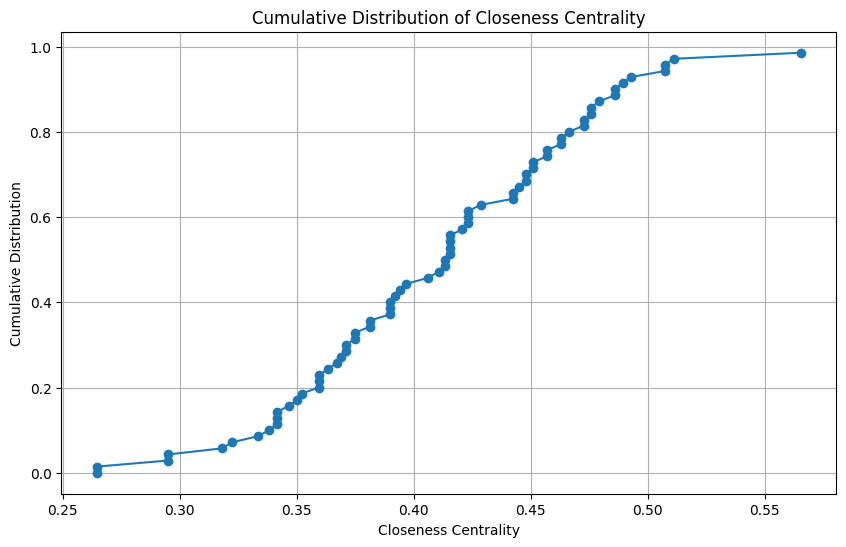

Most Central Node is: ROSE (ID: 5097316)
With a closeness centrality of: 0.566


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Function to compute weighted shortest path lengths from a source node using BFS
def weighted_shortest_path_lengths(G, source):
    visited = set([source])
    dist = {source: 0}
    queue = deque([(source, 0)])  # nodes to explore: (node, distance_so_far)

    while queue:
        (current_node, path_length) = queue.popleft()

        for neighbor in G.neighbors(current_node):
            edge_weight = G.get_edge_data(current_node, neighbor)['weight']
            new_path_length = path_length + edge_weight

            if neighbor not in visited or new_path_length < dist[neighbor]:
                visited.add(neighbor)
                dist[neighbor] = new_path_length
                queue.append((neighbor, new_path_length))

    return dist

# Function to compute closeness centrality using basic functions
def compute_closeness_centrality(G):
    closeness = {}
    n_minus_1 = len(G) - 1

    for node in G.nodes:
        shortest_path_lengths = weighted_shortest_path_lengths(G, node)
        closeness[node] = n_minus_1 / sum(shortest_path_lengths.values())
        
    return closeness

# Function to plot the cumulative distribution of closeness centrality
def plot_cumulative_distribution(centrality_values, title, scale_type='loglog'):
    sorted_values = np.sort(list(centrality_values.values()))
    y_vals = np.arange(len(sorted_values)) / float(len(sorted_values))
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_values, y_vals, marker='o')
    if scale_type == 'loglog':
        plt.xscale('log')
        plt.yscale('log')
    elif scale_type == 'log':
        plt.xscale('log')
    plt.title(f'Cumulative Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Cumulative Distribution')
    plt.grid(True)
    plt.show()

# Compute closeness centrality
closeness_centrality = compute_closeness_centrality(G)

# Find the most central node
most_central_node, max_centrality = max(closeness_centrality.items(), key=lambda x: x[1])

# Accessing label directly from the graph G
most_central_node_label = G.nodes[most_central_node]['label']

# Plotting with different types of scales
plot_cumulative_distribution(closeness_centrality, 'Closeness Centrality', 'linear')

most_central_node_info = (
    f"Most Central Node is: {most_central_node_label} (ID: {most_central_node})\nWith a closeness centrality of: {max_centrality:.3f}"
)

print(most_central_node_info)